# Hotel Analysis

<img src="images/hotel.jpg">

[Credit: vecteezy.com](https://www.vecteezy.com/photo/44153869-beautiful-interior-view-of-a-room-at-coastal)

## Overview

## Business Understanding

The rise of online booking platforms has significantly increased hotel cancellation rates, posing a major financial challenge. A study by <a href="https://www.mirai.com/blog/cancellations-on-booking-com-104-more-than-on-the-hotel-website-expedia-31-more/">Mirai</a> found that cancellation rates from hotel websites (19%) are substantially lower than those from Online Travel Agencies (OTAs) like Booking.com (39%) and Expedia (25%). This trend highlights the significant revenue loss from unoccupied rooms due to last-minute cancellations. For instance, a report by the American Hotel & Lodging Association <a href="https://www.ahla.com/">(AH&LA)</a> indicates that hotels lose an average of 15% in revenue annually due to cancellations.

Beyond revenue loss, cancellations disrupt hotel operations. Last-minute changes can strain staffing schedules, housekeeping arrangements, and potentially lead to guest dissatisfaction if overbooking occurs. To address these challenges and improve our hotel's overall efficiency, I propose developing a predictive model to forecast cancellation risks.

This project aims to create a model that predicts the likelihood of a reservation being canceled. This will enable us to carefully balance occupancy rates with the risk of denied stays, ultimately optimizing revenue, enhancing operational efficiency, and improving the guest experience.

The model's insights will be valuable to key stakeholders like the Head of Hotel and Reservations Operations, Head of Operations, and Finance Team. It will provide a data-driven solution to manage hotel reservations effectively.

To guide the model development and provide actionable recommendations to stakeholders, I will investigate the following questions:

1. Can a model accurately predict the likelihood of a reservation being canceled?
2. What factors contribute most significantly to hotel booking cancellations?
   
By answering these questions, I can build a robust model that helps our hotel effectively manage cancellations and optimize revenue.

## Data Understanding

For this analysis, I leveraged the <a href="https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data">Hotel Booking Cancellation Prediction</a> dataset from Kaggle. This dataset has information from 2017-2018 with36,285 unique lines and 17 columns. This dataset contains the following columns:

1. `Booking_ID` - Unique identifier of each booking
2. `number of adults` - Number of adults included in the booking
3. `number of children` - Number of children included in the booking
4. `number of weekend nights` - Number of weekend nights included in the booking
5. `number of week nights` - Number of week nights included in the booking
6. `type of meal` - Type of meal included in the booking
7. `car parking space` - Indicates whether a car parking space was requested or included in the booking (0 - No, 1- Yes)
8. `room type` - Type of room included in the booking
9. `lead time` - Number of days between the booking date and the arrival date
10. `market segment type` - Type of market segment associated with the booking
11. `repeated` - Indicates whether the booking is a repeat booking (0 - No, 1- Yes)
12. `P-C` - Number of previous bookings that were canceled by the customer prior to the current booking 
13. `P-not-C` - Number of previous bookings not canceled by the customer prior to the current booking
14. `average price` - Average price associated with the booking
15. `special requests`- Total number of special requests made by the guest (example: high floor, room view, etc)
16. `date of reservation` - Date of reservation
17. `booking status` - Status of the booking

The "hotel-booking-cancellation-prediction" dataset is a valuable resource for building a classification model to predict hotel booking cancellations as it encompasses a good variety of features. These features provide  insights into factors that influence guest behavior and cancellation tendencies. By analyzing these factors, I can train a model to spot patterns in past cancellations and confirmed bookings. This will help my company predict future cancellations, allowing us to overbook smarter, boost revenue, and make our operations run smoother.


## Data Preparation

The data preparation for this project will have four different parts:

***1. Data Cleaning:*** As part of Data Cleaning I will have an overview of the data and the shape. Through this process I will check the data types and number of the columns as well as confirm if there are duplicates and drop any unnecesary columns or rows.

***2. Feature Engineering:*** For Feature Engineering we will work on transforming the target feature `booking status` from Not_Canceled and Canceled to 0 and 1. Additionally we will also work on transforming `date of reservation` to see what is the best way to add this information to our model. I will also create a `total_guests` features. Some additional final changes will also be perform.

***3. Feature Selection:*** For Feature Selection, we will work with the 5 features created from `date of reservation`: `reservation_month`, `reservation_year`, `reservation_day_of_week`, `reservation_season` and `reservation_quarter` to decide which one(s) makes more sense to keep in the model to avoid multicollinearity. The feature selection process will include both a Logit Regression and a Decision Tree. 

***4. Data Transformation:*** For the Data Transformation section we will encode the categorical features and scale the numerical values and finally define our Target and Features to run our modelling.


### Data Cleaning

In [192]:
# Import necessary libraries to complete EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import r2_score
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
%matplotlib inline

# Enable copy-on-write for dataframe in pandas
pd.options.mode.copy_on_write = True

# Suppress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [193]:
# Load the dataset into the notebook
df = pd.read_csv('data/booking.csv', encoding='latin-1')

In [194]:
# Preview the dataset
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [195]:
# View the df shape
print("Data shape:", df.shape)
print('\n')

# View the df info
print("Data info:")
df.info()

Data shape: (36285, 17)


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price           

Per the above information, we do not seem to have any missing values so we do not need to decide on an strategy on how to handle these values.

In [196]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


The above information confirmed that we have 36,285 unique rows.

In [197]:
# Frequency tables for categorical features
print("\nCategorical features value counts:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for column: '{col}'")
    print(df[col].value_counts())


Categorical features value counts:

Value counts for column: 'Booking_ID'
Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
           ..
INN12090    1
INN12089    1
INN12088    1
INN12087    1
INN36286    1
Name: count, Length: 36285, dtype: int64

Value counts for column: 'type of meal'
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

Value counts for column: 'room type'
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

Value counts for column: 'market segment type'
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Value counts for column: 'date of reservation'
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231

Per the above information, we have 5 categorical columns: `Booking_ID`, `type of meal`, `room type`, `market segment type`, `date of reservation` and `booking status`. 

In the next line we will drop `Booking_ID` as it is not a needed column. In the next section, ***Feature Engineering*** we will proces the  `date of reservation` and `booking status`. Finally in the ***Data Transformation*** part we will encode the remaining columns: `type of meal`, `room type` and `market segment type`.

In [198]:
#Dropping Booking_ID column
# Columns to drop
cols_to_drop = ['Booking_ID'] 

# Drop the columns
df = df.drop(columns=cols_to_drop)

In [199]:
# Descriptive statistics for numerical features
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Feature Engineering

For Feature engineering we will work on the following:
1. Tranforming the `booking status` from Not_Canceled and Canceled to 0 and 1
2. Transforming `date of reservation`. We will work on creating 5 additional columns based on `date of reservation`: `reservation_month`, `reservation_year`, `reservation_day_of_week`, `reservation_season` and `reservation_quarter`. In the next section, ***Feature Selection*** we will work to see which of these features will be best features to include in our model.
3. I will drop the 2015 and 2016 associated rows as we only have one of each one.
4. I will create a `total_guests` column which is equal to `number of adults` + `number of children`.
5. I will create an interaction feature between `lead_time` * `total_guests` to capture a non linear relationship
6. We will transform the `average price` feature to integer.
7. Finally we will drop the `date of reservation` feature and transform all the column names to be easy to understand the information I am working with.

In [200]:
#Convert the values in the target column to binary (0 or 1)
df['booking status'] = df['booking status'].replace({'Canceled': 1, 'Not_Canceled': 0}) 

In [201]:
# Use map to conditionally change the specific date
df['date of reservation'] = df['date of reservation'].map(lambda x: '2-28-2018' if x == '2018-2-29' else x)

In [202]:
# Convert the 'date' column to datetime format
df['date of reservation'] = pd.to_datetime(df['date of reservation'], format='mixed')

In [203]:
#Feature Engineering based on the 'date of reservation'
df['reservation_month'] = pd.to_datetime(df['date of reservation']).dt.month
df['reservation_year'] = pd.to_datetime(df['date of reservation']).dt.year
df['reservation_day_of_week'] = pd.to_datetime(df['date of reservation']).dt.dayofweek

In [204]:
#Checking the values in 'reservation_year'
df['reservation_year'].value_counts()

reservation_year
2018    29767
2017     6516
2015        1
2016        1
Name: count, dtype: int64

In [205]:
#Dropping from the df the 2 lines with values 2015 and 2016 as their influence is minimal
df = df[~df['reservation_year'].isin([2015, 2016])] 
df=df.reset_index(drop=True)

In [206]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['reservation_season'] = df['reservation_month'].apply(get_season)

In [207]:
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df['reservation_quarter'] = df['reservation_month'].apply(get_quarter)

I will create the `total_guests` column which is equal to `number of adults` + `number of children` as it provides a single, comprehensive measure of the overall number of guests in a reservation. By combining these two features, I effectively reduce the number of input variables to the model and simplify the model. This can help mitigate the impact of potential multicollinearity between these two features.

In [208]:
#Feature Engineering 'total_guests' columns based on 'number of adults' + 'numer of children'
df['total_guests'] = df['number of adults'] + df['number of children']

In [209]:
#Feature Engineering 'lead time * total_guests' columns based on 'number of adults' + 'numer of children'
df['lead_time * total_guests'] = (df['total_guests'] * df['lead time']).round().astype(int)

In [210]:
#Tranforming the average_price feature to int
df["average price"] = df["average price"].round().astype(int)

In [211]:
#Dropping unnecessary columns
# Columns to drop
cols_to_drop = ['date of reservation', 'number of adults','number of children' ] 

# Drop the columns
df = df.drop(columns=cols_to_drop)


In [223]:
#Renaming df columns
#Define new column names as a list
new_column_names = ['num_weekend_nights',
       'num_week_nights', 'type_meal', 'car_parking',
       'room_type', 'lead_time', 'market_segment', 'repeat_booking', 'Previous_cancelled_bookings',
       'Previous_not_cancelled_bookings', 'average_price', 'special_requests', 'booking_status',
       'reservation_month', 'reservation_year', 'reservation_day_of_week',
       'reservation_season', 'reservation_quarter', 'total_guests', 'lead_time * total_guests']

# Rename columns using list comprehension
df.columns=new_column_names

### Feature Selection

Based on the data transformation and feature engineering, we have 5 features (`reservation_month`, `reservation_year`, `reservation_day_of_week`, `reservation_season` and `reservation_quarter`) that are related to the `date of reservation`. If we keep all of these, we will have columns with multicolinearity so this section will concentrate in deciding which of these features are the most important ones to add to my model to explain if a customer cancels their reservation.

This process will include both a OLS, Linear Regression and a Decision Tree for feature selection.

In [224]:
#Creating a list of the features to evaluate
feature_cols = ['reservation_month','reservation_year' , 'reservation_day_of_week', 'reservation_season', 'reservation_quarter']

#Running feature from helper.py which runs a statsmodel for each of the feature_cols to understand how each of these features explains
# the target feature
model_results = helper.compare_models_with_dummies(df, 'booking_status' , feature_cols)

# Print the results of the statsmodel
for feature, stats in model_results.items():
  print(f"Feature: {feature}")
  for stat_name, value in stats.items():
    print(f"  {stat_name}: {value:.4f}")
  print()

Feature: reservation_month
  R-squared: 0.0001
  Adjusted R-squared: 0.0001
  AIC: 38498.9325
  BIC: 38515.4844

Feature: reservation_year
  R-squared: 0.0316
  Adjusted R-squared: 0.0316
  AIC: 37568.0357
  BIC: 37584.5876

Feature: reservation_day_of_week
  R-squared: 0.0010
  Adjusted R-squared: 0.0010
  AIC: 38471.1177
  BIC: 38487.6696

Feature: reservation_season
  R-squared: 0.0319
  Adjusted R-squared: 0.0318
  AIC: 37566.7282
  BIC: 37608.1079

Feature: reservation_quarter
  R-squared: 0.0165
  Adjusted R-squared: 0.0164
  AIC: 38023.6403
  BIC: 38065.0201



Based on the R-squared values, `reservation_year` appears to have the highest causality with the target feature, followed by `reservation_season`. The other features show much lower R-squared values, suggesting a weaker relationship with the target. To further decide between `reservation_year` and `reservation_season` I will run additional Linear regressions and Decision Trees. Finally, we will analyze the R-squared for these models.

In [225]:
# Define features and target
features = ['reservation_year', 'reservation_season']
target = 'booking_status'  

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
#Create One-Hot Encoder for 'reservation_season'
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train[['reservation_season']])

# Create df with One Hot Encoded columns
X_train_encoded = pd.DataFrame(data=encoder.transform(X_train[['reservation_season']]), 
                              columns=encoder.get_feature_names_out(['reservation_season']), index=X_train['reservation_season'].index)
X_train_encoded = pd.concat([X_train_encoded, X_train[['reservation_year']]], axis=1) 

X_test_encoded = pd.DataFrame(encoder.transform(X_test[['reservation_season']]), 
                             columns=encoder.get_feature_names_out(['reservation_season']), index=X_test['reservation_season'].index)
X_test_encoded = pd.concat([X_test_encoded, X_test[['reservation_year']]], axis=1)

In [227]:
# 1. Evaluate Linear Regression with 'reservation_year'

model_year = LinearRegression()
model_year.fit(X_train[['reservation_year']], y_train)
y_pred_year = model_year.predict(X_test[['reservation_year']])
r2_year = r2_score(y_test, y_pred_year)
print(f"R-squared with reservation_year (Linear Regression): {r2_year}")

# 2. Evaluate Linear Regression with 'reservation_season'

model_season = LinearRegression()
model_season.fit(X_train_encoded[['reservation_season_Spring', 'reservation_season_Summer','reservation_season_Winter']], y_train) 
y_pred_season = model_season.predict(X_test_encoded[['reservation_season_Spring', 'reservation_season_Summer', 'reservation_season_Winter']])
r2_season = r2_score(y_test, y_pred_season)
print(f"R-squared with reservation_season (Linear Regression): {r2_season}")

# 3. Evaluate Linear Regression with all features

model_all = LinearRegression()
model_all.fit(X_train_encoded, y_train)
y_pred_all = model_all.predict(X_test_encoded)
r2_all = r2_score(y_test, y_pred_all)
print(f"R-squared with all features (Linear Regression): {r2_all}")

# 4. Evaluate Decision Tree with 'reservation_year'

tree_model_year = DecisionTreeRegressor(random_state=42)
tree_model_year.fit(X_train[['reservation_year']], y_train)
y_pred_tree_year = tree_model_year.predict(X_test[['reservation_year']])
r2_tree_year = r2_score(y_test, y_pred_tree_year)
print(f"R-squared with reservation_year (Decision Tree): {r2_tree_year}")

# 5. Evaluate Decision Tree with 'reservation_season'

tree_model_season = DecisionTreeRegressor(random_state=42)
tree_model_season.fit(X_train_encoded[['reservation_season_Spring', 'reservation_season_Summer', 'reservation_season_Winter']], y_train) 
y_pred_tree_season = tree_model_season.predict(X_test_encoded[['reservation_season_Spring', 'reservation_season_Summer', 'reservation_season_Winter']])
r2_tree_season = r2_score(y_test, y_pred_tree_season)
print(f"R-squared with reservation_season (Decision Tree): {r2_tree_season}")

# 6. Evaluate Decision Tree with all features

tree_model_all = DecisionTreeRegressor(random_state=42)
tree_model_all.fit(X_train_encoded, y_train)
y_pred_tree_all = tree_model_all.predict(X_test_encoded)
r2_tree_all = r2_score(y_test, y_pred_tree_all)
print(f"R-squared with all features (Decision Tree): {r2_tree_all}")

R-squared with reservation_year (Linear Regression): 0.03431643337078005
R-squared with reservation_season (Linear Regression): 0.031988732298403155
R-squared with all features (Linear Regression): 0.06431714070861816
R-squared with reservation_year (Decision Tree): 0.03431643337078061
R-squared with reservation_season (Decision Tree): 0.031988732298404154
R-squared with all features (Decision Tree): 0.06774902203910371


After running both the Linear Regression and Decision Tree, the outcome of these models are the following:

***1. Individual Feature Performance:*** Both `reservation_year` and `reservation_season` show similar R-squared values for both Linear Regression and Decision Tree models. This suggests that, individually, they have comparable predictive power.

***2. Combined Features:*** The model using all features (both `reservation_year` and `reservation_season`) achieves a higher R-squared in both cases, indicating that combining these features improves the model's performance. This suggests that these features might have some complementary information.

Based on the above informarion, my inclination will be to keep both but before doing that I want to confirm that these features are not correlated. We are going to plot two grpahs:'Box Plots' and 'Scatter Scatter plots'.

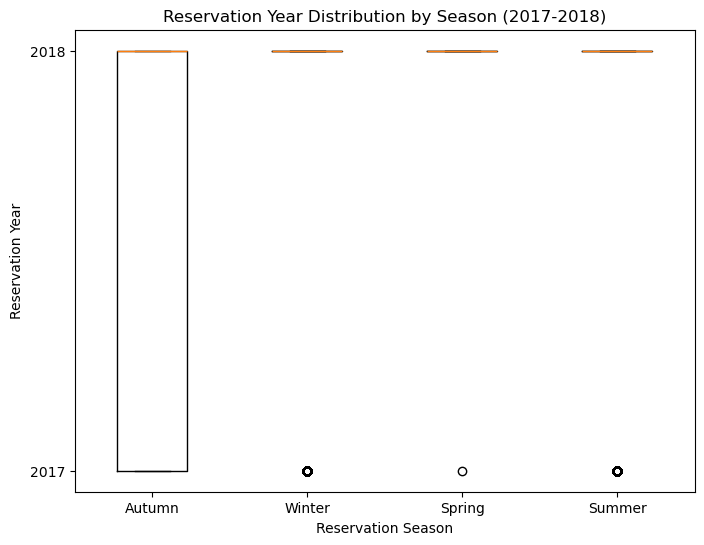

In [228]:
# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['reservation_season'] == season]['reservation_year'] for season in df['reservation_season'].unique()],
            labels=df['reservation_season'].unique())
plt.xlabel('Reservation Season')
plt.ylabel('Reservation Year')
plt.title('Reservation Year Distribution by Season (2017-2018)')
plt.yticks([2017, 2018]) 
plt.show()

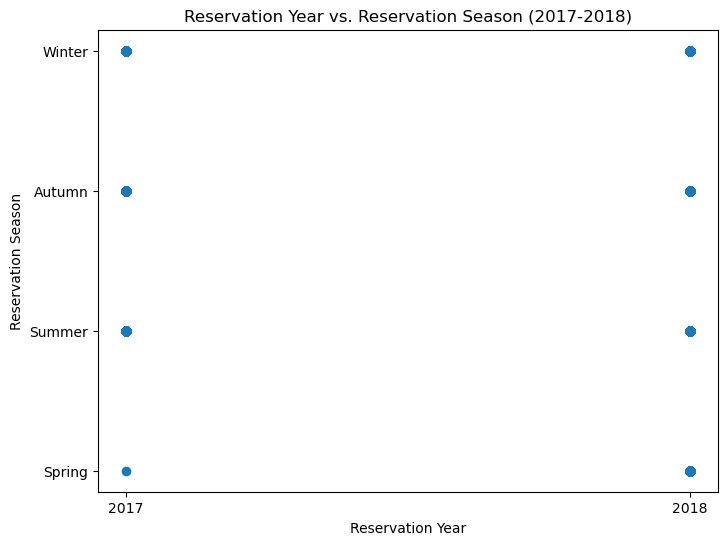

In [229]:
# Assign numerical values to seasons for plotting
Seasons_graph = df['reservation_season'].map({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})

# Filter data by year (if not already done)
df_filtered = df[(df['reservation_year'] == 2017) | (df['reservation_year'] == 2018)]

# Scatter plot with filtered data
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['reservation_year'], Seasons_graph[df_filtered.index])
plt.xlabel('Reservation Year')
plt.ylabel('Reservation Season')
plt.title('Reservation Year vs. Reservation Season (2017-2018)')

# Set x-ticks to 2017 and 2018
plt.xticks([2017, 2018])

plt.yticks([1, 2, 3, 4], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

After completing the visual analysis, I have decideed to keep both `reservation_year` and `reservation_season` in my model, as these two do not appear to exhibit significant multicollinearity. See further explanation below:

- ***Box Plot*** shows that the distributions of `reservation_year` across different seasons are similar. The medians and overall spreads of the `reservation_year` values for each season are comparable, suggesting that the season of the year does not strongly influence the distribution of reservation years.

- ***Scatter Plot*** supports the findings from the Box Plot.While the data points tend to cluster by season, there is no discernible linear trend or pattern suggesting a strong relationship between `reservation_year` and `reservation_season`. The `reservation_year` values are distributed fairly evenly within each season, indicating a lack of significant correlation between these two features.

To further confirm the above, I will run an ANOVA test.

***Null Hypothesis (H0):*** The mean `reservation_year` is the same across all seasons (i.e., there is no significant difference in the mean `reservation_year between` Spring, Summer, Autumn, and Winter).

***Alternative Hypothesis (H1):*** The mean `reservation_year` is different for at least one season compared to the others (i.e., there is a significant difference in the mean `reservation_year between` at least two of the seasons).

In [230]:
# Perform ANOVA
f_statistic, p_value = f_oneway(
    df[df['reservation_season'] == 'Spring']['reservation_year'],
    df[df['reservation_season'] == 'Summer']['reservation_year'],
    df[df['reservation_season'] == 'Autumn']['reservation_year'],
    df[df['reservation_season'] == 'Winter']['reservation_year']
)

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

# Interpret results based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that the mean reservation_year differs significantly across seasons.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that the mean reservation_year differs significantly across seasons.")

ANOVA F-statistic: 1368.384760383967
ANOVA p-value: 0.0
Reject the null hypothesis. There is evidence that the mean reservation_year differs significantly across seasons.


So after I have explored the relationship between `reservation_year` and `reservation_season` using visual and statistical methods. The visaul analysis based in Box plots and a scatter plot initially suggested a weak correlation, with similar distributions of `reservation_year` across seasons. However, ANOVA can detect significant differences in mean `reservation_year` across seasons. If ANOVA rejects the null hypothesis, including both features in a logistic regression model will be the best option for my model. Based on this, my model will have the potential to capture potential interactions and improve predictive accuracy.

Before moving into Data Tranformation, I will do a graph of the numerical variables to see if there is something else I should address through feature engineering. 

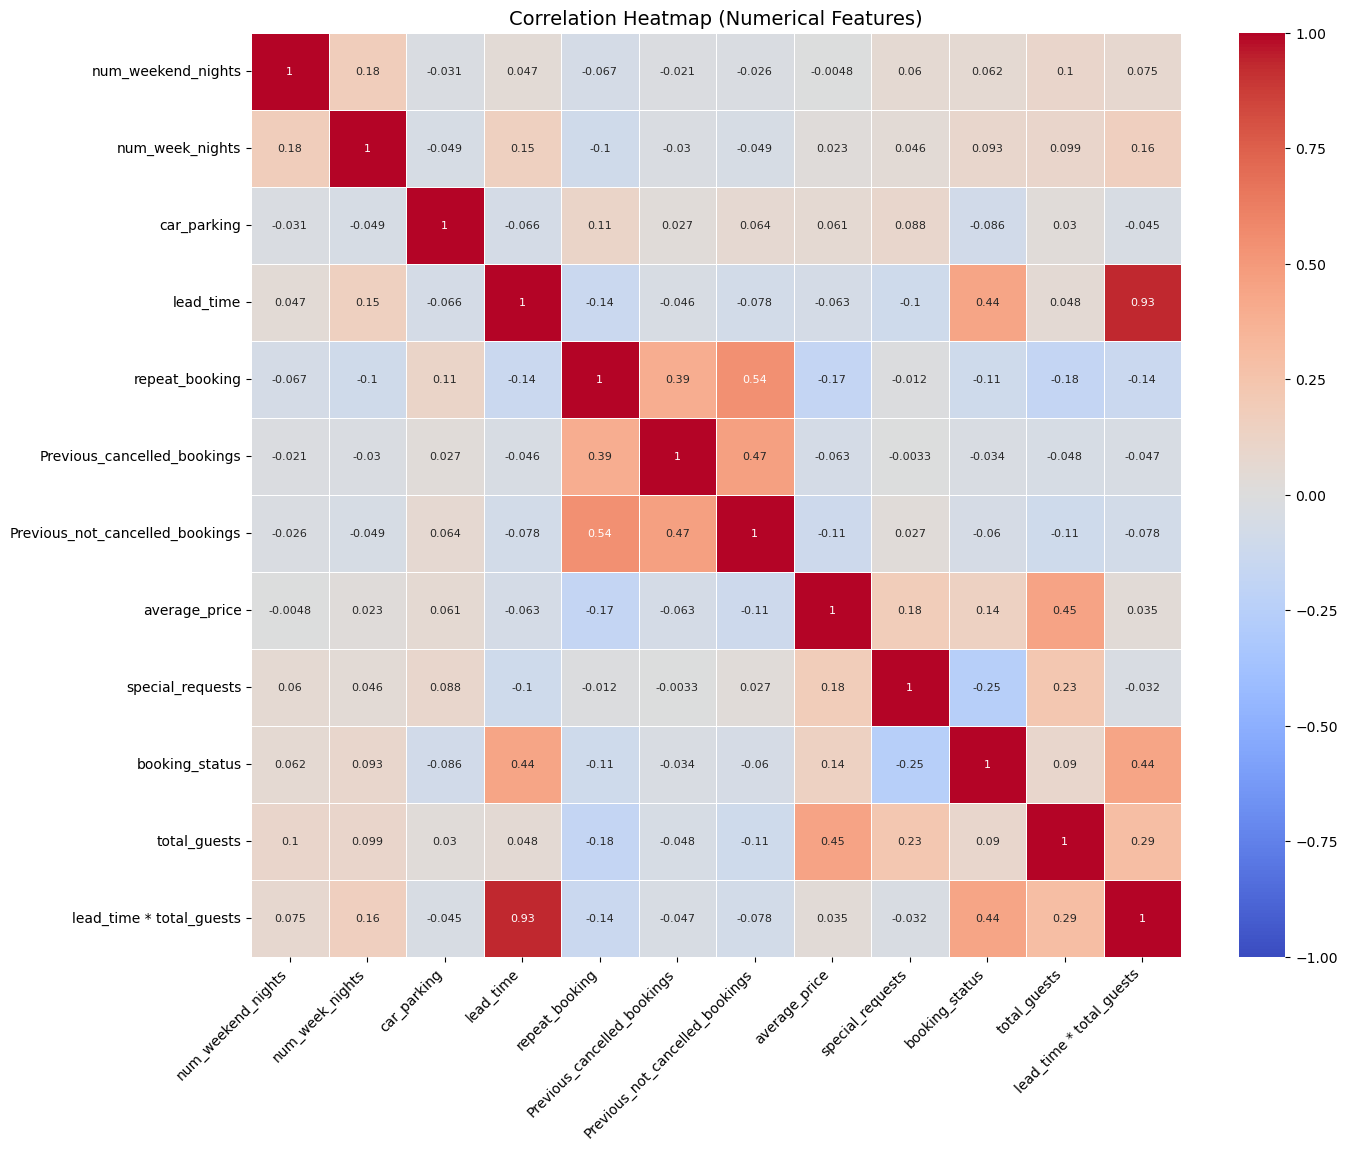

In [231]:
#Creating a new df to drop the features we just decided to drop
df_corr = df.drop(columns=['reservation_month' , 'reservation_day_of_week','reservation_quarter'])

# Select only numerical columns from my df
numerical_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns 

# Create a new dataframe with only the selected numerical columns
numerical_df = df[numerical_cols] 

# Calculate the correlation matrix
corr_matrix = numerical_df.corr() 

#Create and display the heatmap
plt.figure(figsize=(15, 12), dpi=100) 
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            annot_kws={"size": 8}, 
            vmin=-1, 
            vmax=1)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show() 

Based on the correlation matrix, we can see the following:


1. Strong negative correlation between `booking_status` and `previous_cancelled_bookings` (-0.47). Based on this information, we can see that guests with a history of cancellations are significantly less likely to complete their bookings and this should be a key feature in my predictive model.

2. `lead_Time` shows a moderate positive correlation with `previous_not_cancelled_bookings` (0.48), suggesting that guests with a history of successful bookings tend to book further in advance.

3. `average_price` shows moderate positive correlations with `lead_time` and `previous_not_cancelled_bookings`, indicating that guests booking more expensive rooms often plan ahead and have a history of successful bookings.

To complete this feature selection section, there are a couple of other insights I can get from the correlation matrix:
1. `previous_cancelled_bookings` is a highly influential predictor and should be included in my model.
2. Features like `lead_time`, `previous_not_cancelled_bookings`, `average_price` and `total_guests` also show promise and should be carefully considered in the first basic model.

As there might be some multicollinearity between these features: `total_guests`, `lead time`, `Previous_not_cancelled_bookings` and `lead time * total_guests`. I will run additional ***Feature Selection*** for all these features to see if it makes sense to run these in the model or not. 

In [233]:

# Example Usage:
feature_cols = ['total_guests', 'lead_time', 'Previous_not_cancelled_bookings', 'lead_time * total_guests']
model_results = compare_models_with_numerical_features(df, 'booking_status', feature_cols)

# Print the results
for feature, stats in model_results.items():
    print(f"Feature: {feature}")
    for metric, value in stats.items():
        print(f"  - {metric}: {value:.4f}")
    print() 

Feature: total_guests
  - R-squared: 0.0091
  - Adjusted R-squared: 0.0091
  - AIC: 38236.3061
  - BIC: 38252.8580

Feature: lead_time
  - R-squared: 0.1918
  - Adjusted R-squared: 0.1917
  - AIC: 32321.9521
  - BIC: 32338.5040

Feature: Previous_not_cancelled_bookings
  - R-squared: 0.0035
  - Adjusted R-squared: 0.0035
  - AIC: 38398.2136
  - BIC: 38414.7655

Feature: lead_time * total_guests
  - R-squared: 0.1958
  - Adjusted R-squared: 0.1958
  - AIC: 32175.1741
  - BIC: 32191.7260



In [191]:
df


,num_weekend_nights,num_week_nights,type_meal,car_parking,room_type,lead_time,market_segment,repeat_booking,Previous_cancelled_bookings,Previous_not_cancelled_bookings,average_price,special_requests,booking_status,reservation_month,reservation_year,reservation_day_of_week,reservation_season,reservation_quarter,total_guests,lead time * total_guests
0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,107,1,0,11,2018,1,Autumn,Q4,1,5
1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50,0,1,2,2018,2,Winter,Q1,3,3
2,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100,1,1,5,2017,5,Spring,Q2,1,211
3,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77,0,1,4,2018,2,Spring,Q2,1,48
4,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,108,1,0,10,2017,6,Autumn,Q4,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36278,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115,1,1,9,2018,3,Autumn,Q3,2,692
36279,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,108,1,0,10,2017,6,Autumn,Q4,2,68
36280,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,106,1,0,12,2018,2,Winter,Q4,2,166
36281,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,97,1,0,7,2018,4,Summer,Q3,3,363


In [190]:
feature_cols = ['total_guests', 'lead_time', 'Previous_not_cancelled_bookings', 'lead_time * total_guests']

# Get the data types of the specified features
feature_types = df[feature_cols].dtypes

# Print the feature names and their corresponding data types
for feature, dtype in feature_types.items():
    print(f"{feature}: {dtype}")

KeyError: "['lead_time * total_guests'] not in index"

### Data Transformation

For the final step in Data Preparation, we will complete the following steps:
1. Drop the unnecesary features
2. Use `train_test_split` to split my data into test and train data.
3. Use `one_hot_encoder` to encode my categorical features with no ordinal relationship
4. Use `StandardScaler` to standardize numerical features

In [103]:
# Split dataset to create the target variable and features
X = df.drop(columns=['booking_status','reservation_month' , 'reservation_day_of_week','reservation_quarter'], axis = 1)
y = df['booking_status']

In [104]:
# Split the data into a train and test set using 25% for test
# Used random state = 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [105]:
#Create One-Hot Encoder 
encoder = OneHotEncoder(drop='first', sparse_output=False)

#Create df only with the categorical columns
cat_train = X_train[['type_meal', 'room_type', 'market_segment', 'reservation_season']]
cat_test = X_test[['type_meal', 'room_type', 'market_segment', 'reservation_season']]

# Fit the encoder to the training data
encoder.fit(cat_train) 

# Create df with One Hot Encoded columns
X_train_encoded_cat = pd.DataFrame(data=encoder.transform(cat_train), 
                                    columns=encoder.get_feature_names_out(), 
                                    index=cat_train.index)

X_test_encoded_cat = pd.DataFrame(data=encoder.transform(cat_test), 
                                    columns=encoder.get_feature_names_out(), 
                                    index=cat_test.index)

In [107]:
#Start the scaler
scaler = StandardScaler()

#Select numerical columns from the original df
num_cols = ['num_weekend_nights', 'num_week_nights','car_parking', 'lead_time', 'repeat_booking', 'Previous_cancelled_bookings','Previous_not_cancelled_bookings', 'average_price', 'special_requests','reservation_year', 'total_guests']

# Create 'num_train' and 'num_test' using the selected numerical columns
num_train = X_train[num_cols].copy()
num_test = X_test[num_cols].copy()

#Fit and tranform the train data
scaler.fit_transform(num_train)

# Create new dfs with scaler columns
num_train_scaler = pd.DataFrame(data=scaler.transform(num_train), columns=num_train.columns, index=num_train.index)
num_test_scaler = pd.DataFrame(data=scaler.transform(num_test), columns=num_test.columns, index=num_test.index)

In [108]:
# Merging the transformed categorical columns with the scaled numerical columns 
X_train_transformed = pd.concat([num_train_scaler, X_train_encoded_cat], axis=1)
X_test_transformed = pd.concat([num_test_scaler, X_test_encoded_cat], axis=1)

Before moving into the modelling, I'm running a correlation table to understand the correlations between features and potential multicollinearity.

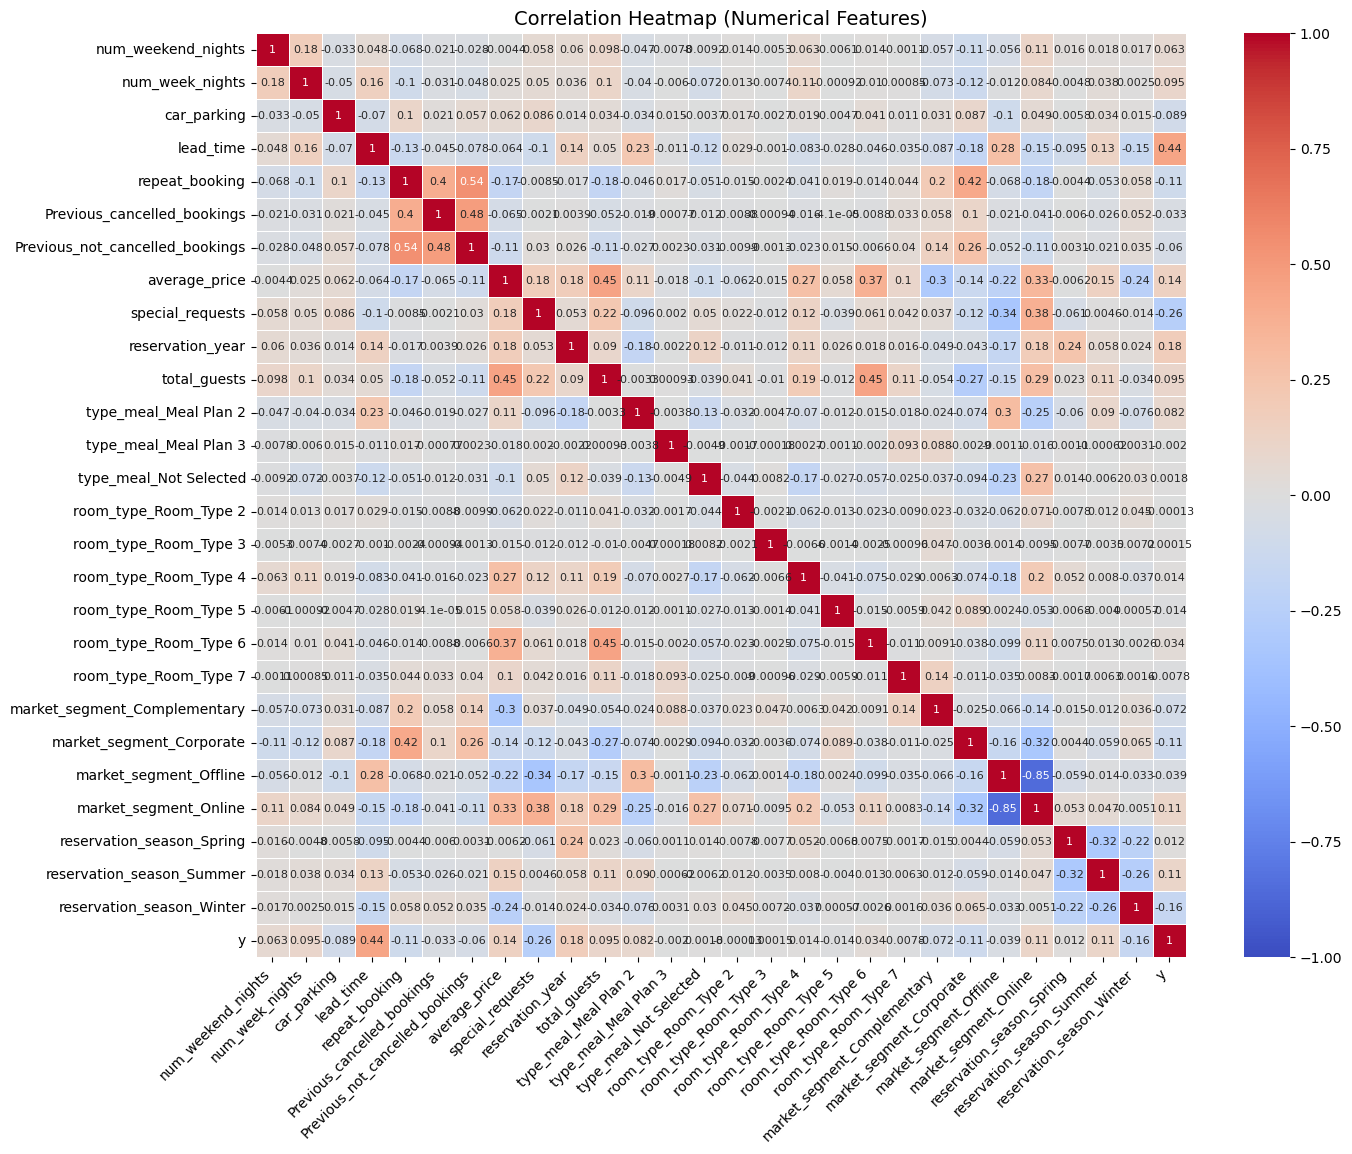

In [109]:
#Checking correlation between the features and target
#Adding 'y' to the encoded and scaled features
X_corr = X_train_transformed
X_corr['y'] = y

# Calculate correlation matrix for numerical features
corr_matrix = X_corr.corr()

# Create a new figure with increased size and DPI for better resolution
plt.figure(figsize=(15, 12), dpi=100) 

# Generate the heatmap with improved aesthetics
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            annot_kws={"size": 8}, 
            vmin=-1, 
            vmax=1) 

# Add a title
plt.title("Correlation Heatmap (Numerical Features)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the heatmap
plt.show()

## Modelling

### Logistic Regression

In [111]:
#Add constant to the training and test data to run a Logit Regression in statsmodel
X_train_sm = sm.add_constant(X_train_transformed)
X_test_sm = sm.add_constant(X_test_transformed)

# Fit the Logistic Regression Model 
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Model Summary
print(logit_model.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                27212
Model:                          Logit   Df Residuals:                    27183
Method:                           MLE   Df Model:                           28
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                   1.000
Time:                        13:11:30   Log-Likelihood:             -0.0073268
converged:                      False   LL-Null:                       -17230.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -20.7426    573.109     -0.036      0.971   -1144.016    1102.531
nu

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Add brief decription of model.
Mention the coefficients with a p-value>0.05

In [112]:
#Evaluating the performance of the model
# Make Predictions
y_pred_prob_train = logit_model.predict(X_train_sm)
y_pred_prob_test = logit_model.predict(X_test_sm)

# Calculate Probabilities
y_pred_train = (y_pred_prob_train > 0.5).astype(int) 
y_pred_test = (y_pred_prob_test > 0.5).astype(int) 

# Evaluate Model Performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train,y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_prob_train)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Train Precision: {precision_train:.3f}")
print(f"Test Precision: {precision_test:.3f}")
print(f"Train Recall: {recall_train:.3f}")
print(f"Test Recall: {recall_test:.3f}")
print(f"Train F1-score: {f1_train:.3f}")
print(f"Test F1-score: {f1_test:.3f}")
print(f"Train AUC: {auc_train:.3f}")
print(f"Test AUC: {auc_test:.3f}")

ValueError: shapes (9071,28) and (29,) not aligned: 28 (dim 1) != 29 (dim 0)

Based on the above information, the model seems to have a ***reasonable performance***. Let me explain all the performance metrics below:

1. Accuracy: The train and the test model have an accuracy of ~80% which means that the model correctly predicts the class labels for a significant proportion of instances.
2. Precision:
3. Recall:
4. F1-score:
5. AUC: 

Train Model: Confusion Matrix


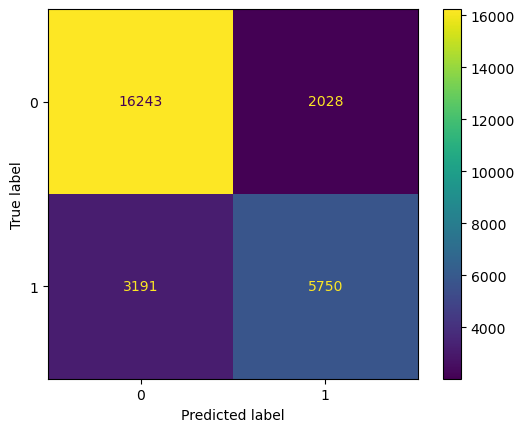

Test Model: Confusion Matrix


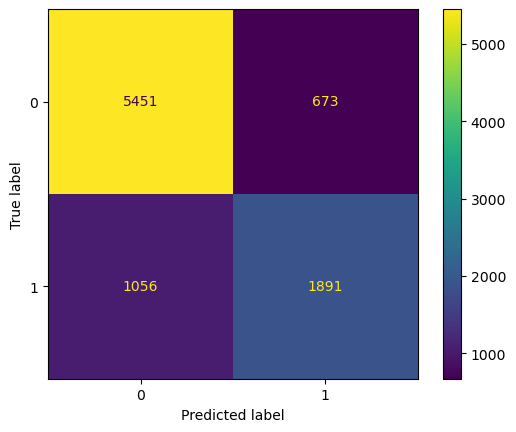

In [49]:
# Confusion Matrix
# Train Model
print('Train Model: Confusion Matrix')
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

# Test Model
print('Test Model: Confusion Matrix')
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

Evaluate confusion matrix

Before we run other models, we will run the Logistic Regression dropping the non signification features. In this case the non significant features are:'Previous_not_cancelled_bookings', 'type_meal_Meal Plan 3 ', 'room_type_Room_Type 3', 'market_segment_Complementary', and 'market_segment_Online'.

In [50]:
#Define columns to drop
cols_to_drop = ['Previous_not_cancelled_bookings', 'type_meal_Meal Plan 3', 'room_type_Room_Type 3', 'market_segment_Complementary','market_segment_Online']

#Dropping columns from the transformed df for the train and test data
X_train_transformed = X_train_transformed.drop(cols_to_drop, axis=1)
X_test_transformed = X_test_transformed.drop(cols_to_drop, axis=1) 

Now we will run the Logistic Regression again.

In [51]:
#Add constant to the training and test data to run a Logit Regression in statsmodel
X_train_sm = sm.add_constant(X_train_transformed)
X_test_sm = sm.add_constant(X_test_transformed)

# Fit the Logistic Regression Model 
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Model Summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.422785
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                27212
Model:                          Logit   Df Residuals:                    27188
Method:                           MLE   Df Model:                           23
Date:                Mon, 13 Jan 2025   Pseudo R-squ.:                  0.3323
Time:                        08:11:42   Log-Likelihood:                -11505.
converged:                       True   LL-Null:                       -17230.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3451      0.040     -8.689      0.000   

In [52]:
#Evaluating the performance of the model
# Make Predictions
y_pred_prob_train = logit_model.predict(X_train_sm)
y_pred_prob_test = logit_model.predict(X_test_sm)

# Calculate Probabilities
y_pred_train = (y_pred_prob_train > 0.5).astype(int) 
y_pred_test = (y_pred_prob_test > 0.5).astype(int) 

# Evaluate Model Performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train,y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_prob_train)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Train Precision: {precision_train:.3f}")
print(f"Test Precision: {precision_test:.3f}")
print(f"Train Recall: {recall_train:.3f}")
print(f"Test Recall: {recall_test:.3f}")
print(f"Train F1-score: {f1_train:.3f}")
print(f"Test F1-score: {f1_test:.3f}")
print(f"Train AUC: {auc_train:.3f}")
print(f"Test AUC: {auc_test:.3f}")

Train Accuracy: 0.808
Test Accuracy: 0.810
Train Precision: 0.739
Test Precision: 0.739
Train Recall: 0.642
Test Recall: 0.642
Train F1-score: 0.687
Test F1-score: 0.687
Train AUC: 0.865
Test AUC: 0.867


Train Model: Confusion Matrix


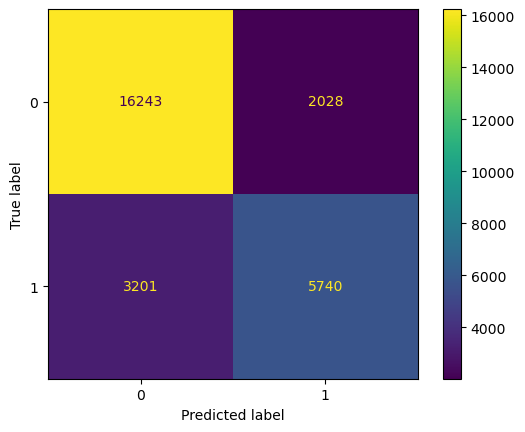

Test Model: Confusion Matrix


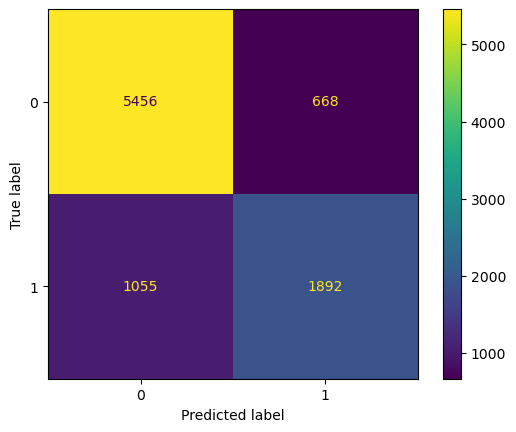

In [53]:
# Confusion Matrix
# Train Model
print('Train Model: Confusion Matrix')
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

# Test Model
print('Test Model: Confusion Matrix')
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

### Decision Tree Classifier Model

In [54]:
#Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, criterion='entropy') 

#Fit the model to the training data
model.fit(X_train_transformed, y_train)

#Make predictions
y_pred_train = model.predict(X_train_transformed)
y_pred_test = model.predict(X_test_transformed)

#Calculate probabilities
y_pred_prob_train = model.predict_proba(X_train_transformed)[:, 1] 
y_pred_prob_test = model.predict_proba(X_test_transformed)[:, 1] 

#Evaluate Model Performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_prob_train)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Train Precision: {precision_train:.3f}")
print(f"Test Precision: {precision_test:.3f}")
print(f"Train Recall: {recall_train:.3f}")
print(f"Test Recall: {recall_test:.3f}")
print(f"Train F1-score: {f1_train:.3f}")
print(f"Test F1-score: {f1_test:.3f}")
print(f"Train AUC: {auc_train:.3f}")
print(f"Test AUC: {auc_test:.3f}")
print(f"Depth of Decision Tree: {model.get_depth()}")

Train Accuracy: 0.993
Test Accuracy: 0.866
Train Precision: 0.996
Test Precision: 0.793
Train Recall: 0.983
Test Recall: 0.797
Train F1-score: 0.990
Test F1-score: 0.795
Train AUC: 1.000
Test AUC: 0.850
Depth of Decision Tree: 43


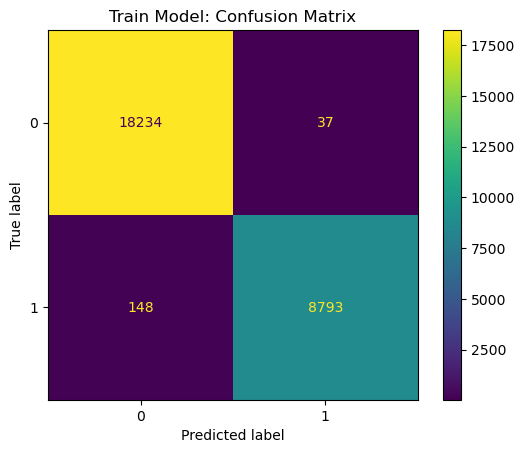

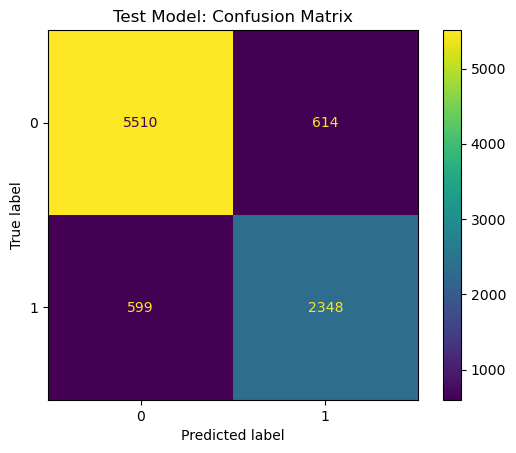

In [55]:
#Confusion Matrix
#Train Data
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.title("Train Model: Confusion Matrix")
plt.show()

#Test Data
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.title("Test Model: Confusion Matrix")
plt.show()

Explanation

#### Tree Pruning

In [69]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5], 
}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                          scoring='precision', cv=5, n_jobs=-1) 

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)

# Evaluate the best model on the test set
test_precision = precision_score(y_test, y_pred)
print("Test Precision:", test_precision) 

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}
Test Precision: 0.8259597806215722


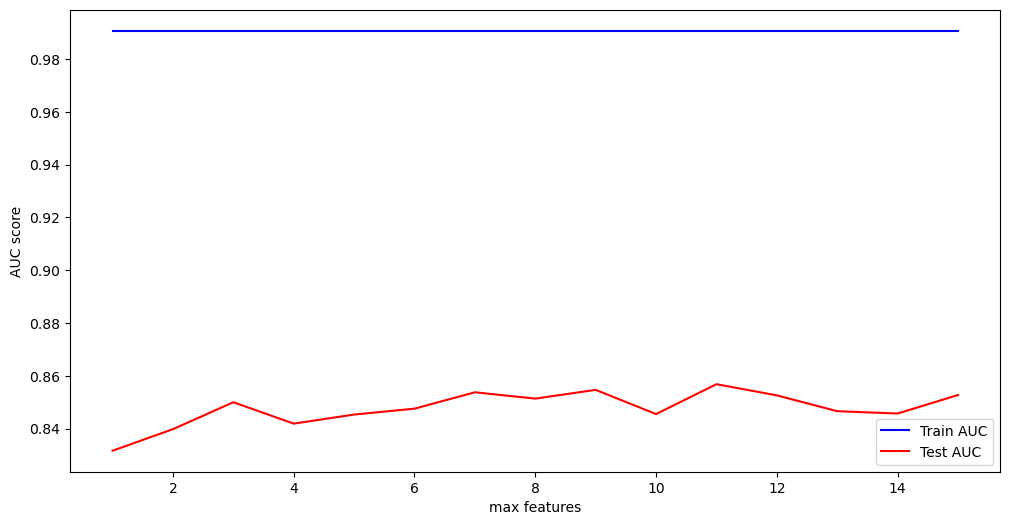

In [87]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    dt.fit(X_train_transformed, y_train)
    train_pred = dt.predict(X_train_transformed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_transformed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

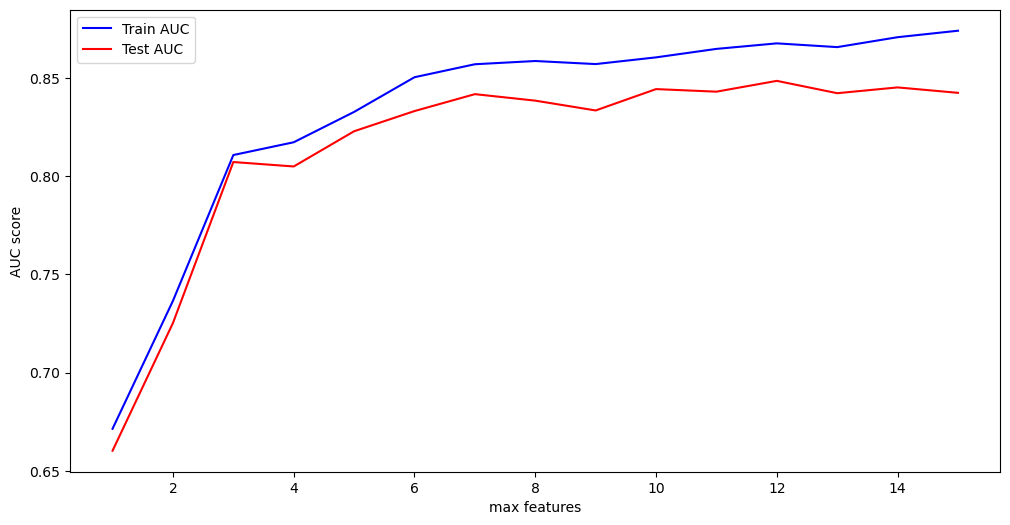

In [89]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42, max_depth=15, min_samples_split=20, min_samples_leaf=5)
    dt.fit(X_train_transformed, y_train)
    train_pred = dt.predict(X_train_transformed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_transformed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Running a Pruned Decision Tree

Model with Max features = 6 

In [91]:
#Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=15, min_samples_split=20, min_samples_leaf=5, max_features=6) 

#Fit the model to the training data
model.fit(X_train_transformed, y_train)

#Make predictions
y_pred_train = model.predict(X_train_transformed)
y_pred_test = model.predict(X_test_transformed)

#Calculate probabilities
y_pred_prob_train = model.predict_proba(X_train_transformed)[:, 1] 
y_pred_prob_test = model.predict_proba(X_test_transformed)[:, 1] 

#Evaluate Model Performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_prob_train)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Train Precision: {precision_train:.3f}")
print(f"Test Precision: {precision_test:.3f}")
print(f"Train Recall: {recall_train:.3f}")
print(f"Test Recall: {recall_test:.3f}")
print(f"Train F1-score: {f1_train:.3f}")
print(f"Test F1-score: {f1_test:.3f}")
print(f"Train AUC: {auc_train:.3f}")
print(f"Test AUC: {auc_test:.3f}")
print(f"Depth of Decision Tree: {model.get_depth()}")

Train Accuracy: 0.875
Test Accuracy: 0.859
Train Precision: 0.832
Test Precision: 0.795
Train Recall: 0.777
Test Recall: 0.760
Train F1-score: 0.804
Test F1-score: 0.777
Train AUC: 0.943
Test AUC: 0.918
Depth of Decision Tree: 15


Train Model: Confusion Matrix


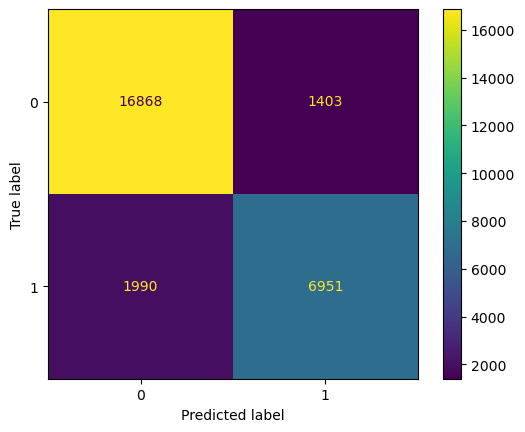

Test Model: Confusion Matrix


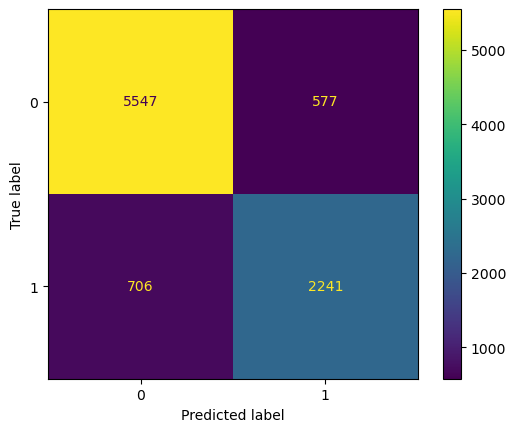

In [92]:
# Confusion Matrix
# Train Model
print('Train Model: Confusion Matrix')
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

# Test Model
print('Test Model: Confusion Matrix')
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

Model without changing max features

In [93]:
#Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=15, min_samples_split=20, min_samples_leaf=5) 

#Fit the model to the training data
model.fit(X_train_transformed, y_train)

#Make predictions
y_pred_train = model.predict(X_train_transformed)
y_pred_test = model.predict(X_test_transformed)

#Calculate probabilities
y_pred_prob_train = model.predict_proba(X_train_transformed)[:, 1] 
y_pred_prob_test = model.predict_proba(X_test_transformed)[:, 1] 

#Evaluate Model Performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_prob_train)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Train Precision: {precision_train:.3f}")
print(f"Test Precision: {precision_test:.3f}")
print(f"Train Recall: {recall_train:.3f}")
print(f"Test Recall: {recall_test:.3f}")
print(f"Train F1-score: {f1_train:.3f}")
print(f"Test F1-score: {f1_test:.3f}")
print(f"Train AUC: {auc_train:.3f}")
print(f"Test AUC: {auc_test:.3f}")
print(f"Depth of Decision Tree: {model.get_depth()}")

Train Accuracy: 0.895
Test Accuracy: 0.872
Train Precision: 0.874
Test Precision: 0.826
Train Recall: 0.795
Test Recall: 0.767
Train F1-score: 0.833
Test F1-score: 0.795
Train AUC: 0.962
Test AUC: 0.927
Depth of Decision Tree: 15


Train Model: Confusion Matrix


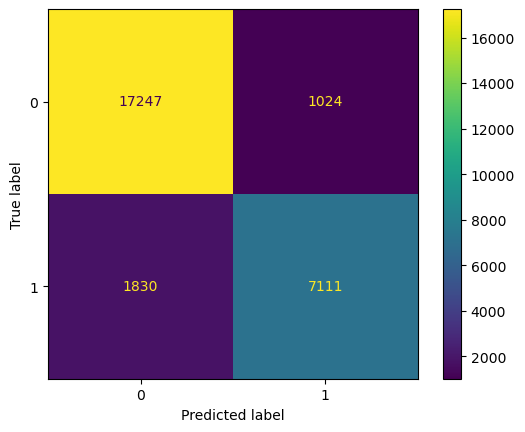

Test Model: Confusion Matrix


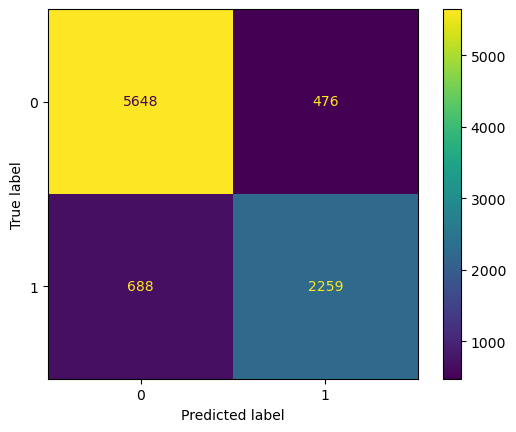

In [94]:
# Confusion Matrix
# Train Model
print('Train Model: Confusion Matrix')
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

# Test Model
print('Test Model: Confusion Matrix')
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()